## Data Analysis for Final Project

#### Tittle: Synthesis of Sodalite Through Modification of Coal Fly Ash with CTAB (Cetyltrimethylammonium Bromide) for the Adsorption of Methyl Orange Dye 

Created by: Ricky Fasha Setiawan (NIM 20/462246/PA/20218)

This code contains:
 1. Graph for Calibration Curve
 2. Optimized Value Analysis for CFA_S and CFA_S_CTAB
 3. Kinetics Study
 4. Thermodynamics Study
 5. Adsorbent Reusability Study

## 1. Graph for Calibration Curve

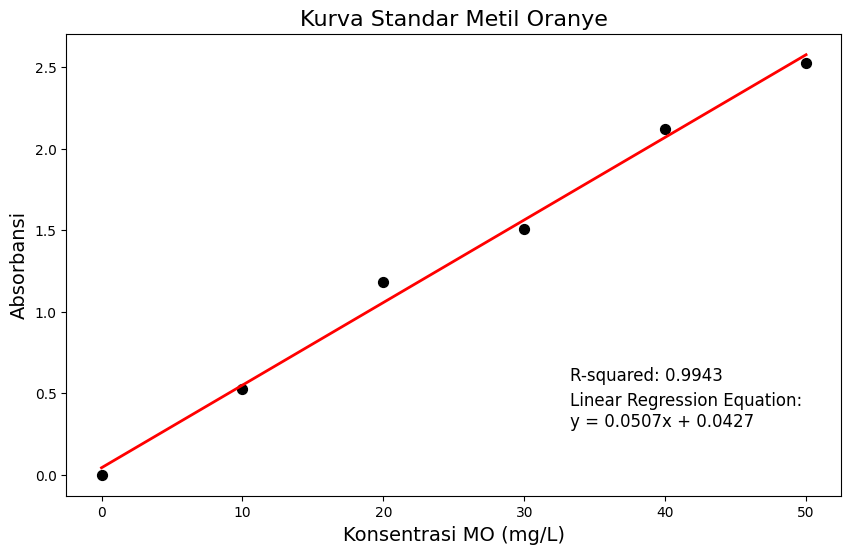

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Sample data for concentration (mg/L) and corresponding adsorbance
concentration = np.array([0, 10, 20, 30, 40, 50])  # Example concentration values
adsorbance = np.array([0, 0.525, 1.18,  1.508, 2.12,  2.525])  # Corresponding adsorbance values

# Reshape the data for sklearn LinearRegression
X = concentration.reshape(-1, 1)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model with data
model.fit(X, adsorbance)

# Make predictions using the model
predicted_adsorbance = model.predict(X)

# Calculate R-squared
r_squared = r2_score(adsorbance, predicted_adsorbance)

# Plot the standard curve
plt.figure(figsize=(10, 6))

# Scatter plot for actual data
plt.scatter(concentration, adsorbance, color='black', s=50)

# Line plot for linear regression
plt.plot(concentration, predicted_adsorbance, color='red', linewidth=2)

# Annotate linear regression equation and R-squared
equation_text = f'Linear Regression Equation:\ny = {model.coef_[0]:.4f}x + {model.intercept_:.4f}'
r_squared_text = f'R-squared: {r_squared:.4f}'
plt.annotate(equation_text, xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12, color='black')
plt.annotate(r_squared_text, xy=(0.65, 0.25), xycoords='axes fraction', fontsize=12, color='black')

# Customize the plot
plt.xlabel('Konsentrasi MO (mg/L)', fontsize=14)
plt.ylabel('Absorbansi', fontsize=14)
plt.title('Kurva Standar Metil Oranye', fontsize=16)
plt.grid(False)
plt.show()


## 2. Finding Optimized Value for Percentage of Adsorption from Several Parameters

#### **1. Optimum Mass**

**A. Mass CFA_S**

In [139]:
##load Dataset
import pandas as pd

# Load your dataset from Excel file
df = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/Mass_CFA_S.xlsx')
df.head()

,mass,adsorbance
0,0.010,0.245415
1,0.025,0.220358
2,0.050,0.171985
3,0.075,0.119552
4,0.100,0.083512


In [141]:
# Linear Regression Equation: y = 0.0507x + 0.0427
# Calculate Cf using the regression equation
df['Cremaining'] = (df['adsorbance'] - 0.0427) / 0.0507

# Calculate Cadsorbed (initial C - Cf)
initial_C = 40
df['Cadsorbed'] = initial_C - df['Cremaining']

# Calculate percentage of adsorption (Cadsorbed / initial C * 100%)
df['Adsorption_Percentage'] = (df['Cadsorbed'] / initial_C) * 100

# Export the data to a new Excel file
df.to_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_Mass_CFA_S.xlsx', index=False)

# Print the first few rows of the resulting DataFrame
df.head()

,mass,adsorbance,Cremaining,Cadsorbed,Adsorption_Percentage
0,0.010,0.245415,3.998320,36.001680,90.004201
1,0.025,0.220358,3.504095,36.495905,91.239763
2,0.050,0.171985,2.550002,37.449998,93.624994
3,0.075,0.119552,1.515818,38.484182,96.210456
4,0.100,0.083512,0.804970,39.195030,97.987574


**B. Mass CFA_S_CTAB**

In [142]:
##load Dataset
import pandas as pd

# Load your dataset from Excel file
df = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/Mass_CFA_S_CTAB.xlsx')
df.head()

,mass,adsorbance
0,0.010,0.208912
1,0.025,0.161032
2,0.050,0.116184
3,0.075,0.090785
4,0.100,0.053188


In [143]:
# Linear Regression Equation: y = 0.0507x + 0.0427
# Calculate Cf using the regression equation
df['Cremaining'] = (df['adsorbance'] - 0.0427) / 0.0507

# Calculate Cadsorbed (initial C - Cf)
initial_C = 40
df['Cadsorbed'] = initial_C - df['Cremaining']

# Calculate percentage of adsorption (Cadsorbed / initial C * 100%)
df['Adsorption_Percentage'] = (df['Cadsorbed'] / initial_C) * 100

# Export the data to a new Excel file
df.to_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_Mass_CFA_S_CTAB.xlsx', index=False)

# Print the first few rows of the resulting DataFrame
df.head()


,mass,adsorbance,Cremaining,Cadsorbed,Adsorption_Percentage
0,0.010,0.208912,3.278343,36.721657,91.804142
1,0.025,0.161032,2.333964,37.666036,94.165089
2,0.050,0.116184,1.449396,38.550604,96.376509
3,0.075,0.090785,0.948426,39.051574,97.628935
4,0.100,0.053188,0.206864,39.793136,99.482840


**C. Comparison**

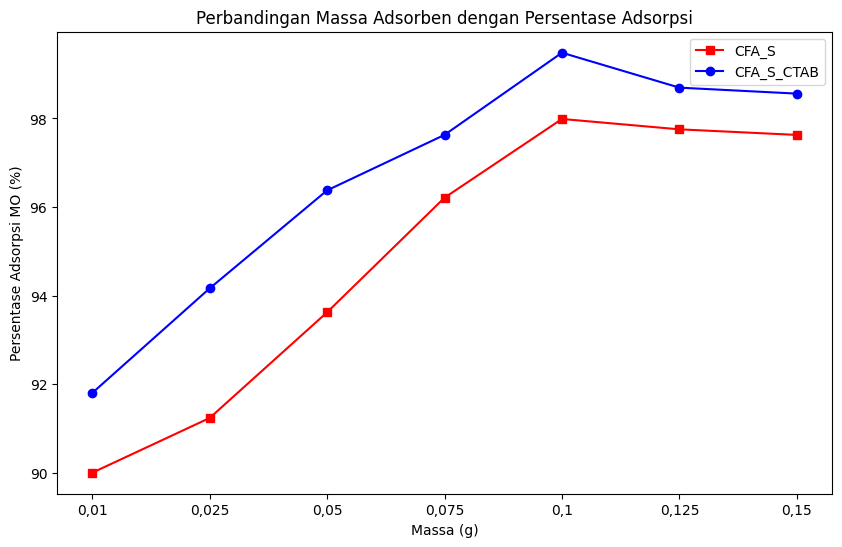

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
file_path_cfa_s = 'C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_Mass_CFA_S.xlsx'
file_path_cfa_s_ctab = 'C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_Mass_CFA_S_CTAB.xlsx'

df_cfa_s = pd.read_excel(file_path_cfa_s)
df_cfa_s_ctab = pd.read_excel(file_path_cfa_s_ctab)

# Define x-axis values for CFA_S
x_values_cfa_s = ['0,01', '0,025', '0,05', '0,075', '0,1', '0,125', '0,15']

# Define x-axis values for CFA_S_CTAB
x_values_cfa_s_ctab = ['0,01', '0,025', '0,05', '0,075', '0,1', '0,125', '0,15']

# Create the plot
plt.figure(figsize=(10, 6))

# Line plot for CFA_S
plt.plot(x_values_cfa_s, df_cfa_s['Adsorption_Percentage'], label='CFA_S', marker='s', color="red")

# Line plot for CFA_S_CTAB
plt.plot(x_values_cfa_s_ctab, df_cfa_s_ctab['Adsorption_Percentage'], label='CFA_S_CTAB', marker='o', color="blue")

# Set labels and title
plt.xlabel('Massa (g)')
plt.ylabel('Persentase Adsorpsi MO (%)')
plt.title('Perbandingan Massa Adsorben dengan Persentase Adsorpsi')

# Show legend
plt.legend()

# Show the plot
plt.show()


#### **2. Optimum Time**

   **A. Time CFA_S**

In [145]:
##load Dataset
import pandas as pd

# Load your dataset from Excel file
df = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/Time_CFA_S.xlsx')
df.head()

,time,adsorbance
0,15,0.298288
1,30,0.250408
2,45,0.200020
3,60,0.123868
4,75,0.120448


In [149]:
# Linear Regression Equation: y = 0.0507x + 0.0427
# Calculate Cf using the regression equation
df['Cremaining'] = (df['adsorbance'] - 0.0427) / 0.0507

# Calculate Cadsorbed (initial C - Cf)
initial_C = 40
df['Cadsorbed'] = initial_C - df['Cremaining']

# Calculate percentage of adsorption (Cadsorbed / initial C * 100%)
df['Adsorption_Percentage'] = (df['Cadsorbed'] / initial_C) * 100

# Export the data to a new Excel file
df.to_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_Time_CFA_S.xlsx', index=False)

# Print the first few rows of the resulting DataFrame
df.head()


,time,adsorbance,Cremaining,Cadsorbed,Adsorption_Percentage
0,15,0.230344,3.701065,36.298935,90.747337
1,30,0.175396,2.617278,37.382722,93.456805
2,45,0.123184,1.587456,38.412544,96.031361
3,60,0.083512,0.804970,39.195030,97.987574
4,75,0.081232,0.760000,39.240000,98.100000


**B. Time CFA_S_CTAB**

In [147]:
##load Dataset
import pandas as pd

# Load your dataset from Excel file
df = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/Time_CFA_S_CTAB.xlsx')
df.head()

,time,adsorbance
0,15,0.230344
1,30,0.175396
2,45,0.123184
3,60,0.083512
4,75,0.081232


In [150]:
# Linear Regression Equation: y = 0.0507x + 0.0427
# Calculate Cf using the regression equation
df['Cremaining'] = (df['adsorbance'] - 0.0427) / 0.0507

# Calculate Cadsorbed (initial C - Cf)
initial_C = 40
df['Cadsorbed'] = initial_C - df['Cremaining']

# Calculate percentage of adsorption (Cadsorbed / initial C * 100%)
df['Adsorption_Percentage'] = (df['Cadsorbed'] / initial_C) * 100

# Export the data to a new Excel file
df.to_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_Time_CFA_S_CTAB.xlsx', index=False)

# Print the first few rows of the resulting DataFrame
df.head()


,time,adsorbance,Cremaining,Cadsorbed,Adsorption_Percentage
0,15,0.230344,3.701065,36.298935,90.747337
1,30,0.175396,2.617278,37.382722,93.456805
2,45,0.123184,1.587456,38.412544,96.031361
3,60,0.083512,0.804970,39.195030,97.987574
4,75,0.081232,0.760000,39.240000,98.100000


**C. Comparison**

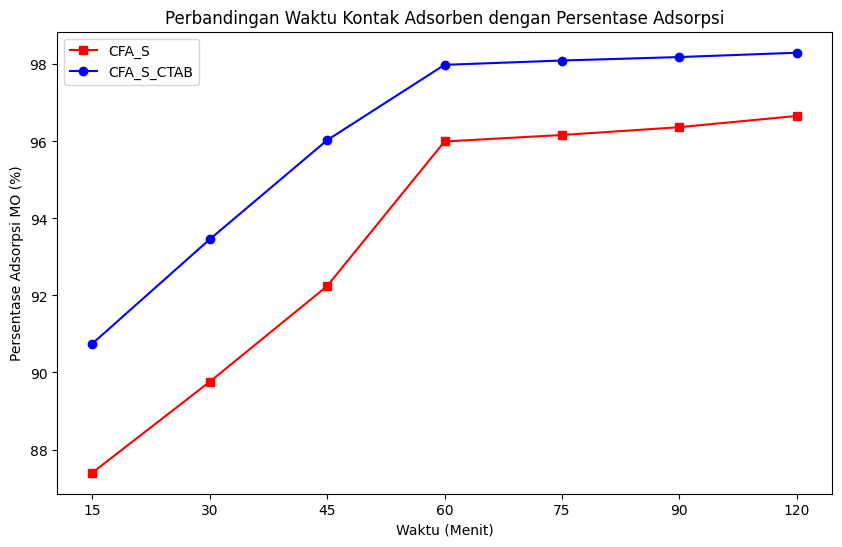

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
file_path_cfa_s = 'C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_Time_CFA_S.xlsx'
file_path_cfa_s_ctab = 'C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_Time_CFA_S_CTAB.xlsx'

df_cfa_s = pd.read_excel(file_path_cfa_s)
df_cfa_s_ctab = pd.read_excel(file_path_cfa_s_ctab)

# Define x-axis values for CFA_S
x_values_cfa_s = ['15', '30', '45', '60', '75', '90', '120']

# Define x-axis values for CFA_S_CTAB
x_values_cfa_s_ctab = ['15', '30', '45', '60', '75', '90', '120']

# Create the plot
plt.figure(figsize=(10, 6))

# Line plot for CFA_S
plt.plot(x_values_cfa_s, df_cfa_s['Adsorption_Percentage'], label='CFA_S', marker='s', color="red")

# Line plot for CFA_S_CTAB
plt.plot(x_values_cfa_s_ctab, df_cfa_s_ctab['Adsorption_Percentage'], label='CFA_S_CTAB', marker='o', color="blue")

# Set labels and title
plt.xlabel('Waktu (Menit)')
plt.ylabel('Persentase Adsorpsi MO (%)')
plt.title('Perbandingan Waktu Kontak Adsorben dengan Persentase Adsorpsi')

# Show legend
plt.legend()

# Show the plot
plt.show()

#### **3. Optimum Innitial Concentration**

**A. IC CFA_S**

In [152]:
##load Dataset
import pandas as pd

# Load your dataset from Excel file
df = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/IC_CFA_S.xlsx')
df.head()

,IC,adsorbance
0,5,0.045251
1,10,0.049027
2,20,0.061179
3,40,0.082463
4,60,0.141572


In [153]:
# Linear Regression Equation: y = 0.0507x + 0.0427
# Calculate Cf using the regression equation
df['Cremaining'] = (df['adsorbance'] - 0.0427) / 0.0507

# Calculate Cadsorbed (initial C - Cf)
initial_C = df['IC']
df['Cadsorbed'] = initial_C - df['Cremaining']

# Calculate ['qe'] = (Cadsorbed * 0.01) / 0.1
df['qe'] = ((df['IC'] - df['Cremaining']) * 0.01) / 0.1

# Calculate percentage of adsorption (Cadsorbed / initial C * 100%)
df['Adsorption_Percentage'] = (df['Cadsorbed'] / initial_C) * 100

# Calculate ['1/qe'] and ['1/Cads']
df['1/qe'] = 1 / df['qe']
df['1/Cremaining'] = 1 / df['Cremaining']

# Calculate logarithmic values
df['Log qe'] = np.log(df['qe'])
df['Log Crem'] = np.log(df['Cremaining'])

# Export the data to a new Excel file
df.to_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_IC_CFA_S.xlsx', index=False)

# Print the first few rows of the resulting DataFrame
df.head()


,IC,adsorbance,Cremaining,Cadsorbed,qe,Adsorption_Percentage,1/qe,1/Cremaining,Log qe,Log Crem
0,5,0.045251,0.050311,4.949689,0.494969,98.993787,2.020329,19.876507,-0.703260,-2.989538
1,10,0.049027,0.124793,9.875207,0.987521,98.752071,1.012637,8.013276,-0.012558,-2.081100
2,20,0.061179,0.364485,19.635515,1.963551,98.177574,0.509281,2.743596,0.674755,-1.009269
3,40,0.082463,0.784284,39.215716,3.921572,98.039290,0.255000,1.275048,1.366492,-0.242984
4,60,0.141572,1.950142,58.049858,5.804986,96.749763,0.172266,0.512783,1.758717,0.667902


**B. IC CFA_S_CTAB**

In [154]:
##load Dataset
import pandas as pd

# Load your dataset from Excel file
df = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/IC_CFA_S_CTAB.xlsx')
df.head()

,IC,adsorbance
0,5,0.043621
1,10,0.044860
2,20,0.049301
3,40,0.059868
4,60,0.087639


In [155]:
# Linear Regression Equation: y = 0.0507x + 0.0427
# Calculate Cf using the regression equation
df['Cremaining'] = (df['adsorbance'] - 0.0427) / 0.0507

# Calculate Cadsorbed (initial C - Cf)
initial_C = df['IC']
df['Cadsorbed'] = initial_C - df['Cremaining']

# Calculate ['qe'] = (Cadsorbed * 0.01) / 0.1
df['qe'] = ((df['IC'] - df['Cremaining']) * 0.01) / 0.1

# Calculate percentage of adsorption (Cadsorbed / initial C * 100%)
df['Adsorption_Percentage'] = (df['Cadsorbed'] / initial_C) * 100

# Calculate ['1/qe'] and ['1/Cads']
df['1/qe'] = 1 / df['qe']
df['1/Cremaining'] = 1 / df['Cremaining']

# Calculate logarithmic values
df['Log qe'] = np.log(df['qe'])
df['Log Crem'] = np.log(df['Cremaining'])

# Export the data to a new Excel file
df.to_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_IC_CFA_S_CTAB.xlsx', index=False)

# Print the first few rows of the resulting DataFrame
df.head()


,IC,adsorbance,Cremaining,Cadsorbed,qe,Adsorption_Percentage,1/qe,1/Cremaining,Log qe,Log Crem
0,5,0.043621,0.018157,4.981843,0.498184,99.636864,2.007289,55.075770,-0.696785,-4.008710
1,10,0.044860,0.042609,9.957391,0.995739,99.573905,1.004279,23.468963,-0.004270,-3.155679
2,20,0.049301,0.130189,19.869811,1.986981,99.349053,0.503276,7.681120,0.686616,-2.038765
3,40,0.059868,0.338627,39.661373,3.966137,99.153432,0.252134,2.953100,1.377793,-1.082855
4,60,0.087639,0.886367,59.113633,5.911363,98.522722,0.169166,1.128201,1.776876,-0.120624


**C. Comparison**

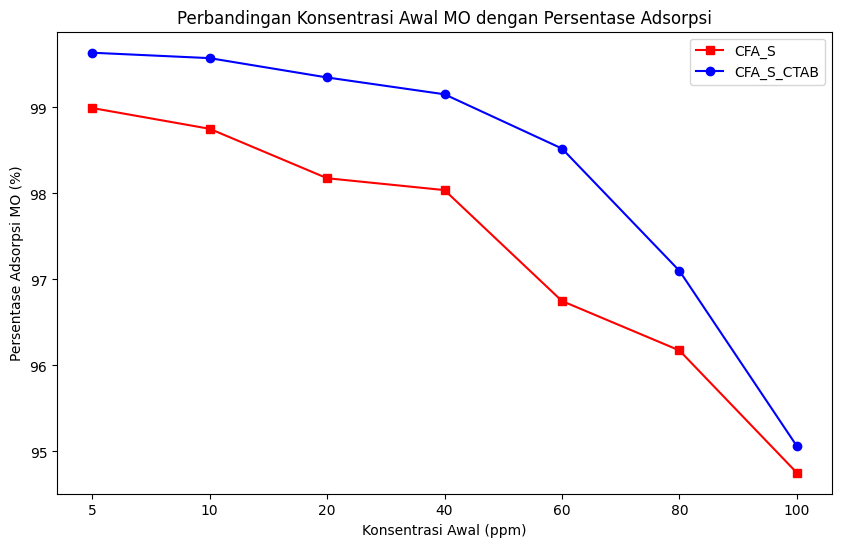

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
file_path_cfa_s = 'C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_IC_CFA_S.xlsx'
file_path_cfa_s_ctab = 'C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_IC_CFA_S_CTAB.xlsx'

df_cfa_s = pd.read_excel(file_path_cfa_s)
df_cfa_s_ctab = pd.read_excel(file_path_cfa_s_ctab)

# Define x-axis values for CFA_S
x_values_cfa_s = ['5', '10', '20', '40', '60', '80', '100']

# Define x-axis values for CFA_S_CTAB
x_values_cfa_s_ctab = ['5', '10', '20', '40', '60', '80', '100']

# Create the plot
plt.figure(figsize=(10, 6))

# Line plot for CFA_S
plt.plot(x_values_cfa_s, df_cfa_s['Adsorption_Percentage'], label='CFA_S', marker='s', color="red")

# Line plot for CFA_S_CTAB
plt.plot(x_values_cfa_s_ctab, df_cfa_s_ctab['Adsorption_Percentage'], label='CFA_S_CTAB', marker='o', color="blue")

# Set labels and title
plt.xlabel('Konsentrasi Awal (ppm)')
plt.ylabel('Persentase Adsorpsi MO (%)')
plt.title('Perbandingan Konsentrasi Awal MO dengan Persentase Adsorpsi')

# Show legend
plt.legend()

# Show the plot
plt.show()


#### **4. Optimum PH**

**A. PH CFA_S**

In [157]:
##load Dataset
import pandas as pd

# Load your dataset from Excel file
df = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/PH_CFA_S.xlsx')
df.head()

,PH,adsorbance
0,2,0.134516
1,4,0.754288
2,6,1.687404
3,8,1.989320


In [158]:
# Linear Regression Equation: y = 0.0507x + 0.0427
# Calculate Cf using the regression equation
df['Cremaining'] = (df['adsorbance'] - 0.0427) / 0.0507

# Calculate Cadsorbed (initial C - Cf)
initial_C = 40
df['Cadsorbed'] = initial_C - df['Cremaining']

# Calculate percentage of adsorption (Cadsorbed / initial C * 100%)
df['Adsorption_Percentage'] = (df['Cadsorbed'] / initial_C) * 100

# Export the data to a new Excel file
df.to_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_PH_CFA_S.xlsx', index=False)

# Print the first few rows of the resulting DataFrame
df.head()


,PH,adsorbance,Cremaining,Cadsorbed,Adsorption_Percentage
0,2,0.134516,1.810959,38.189041,95.472604
1,4,0.754288,14.035266,25.964734,64.911834
2,6,1.687404,32.439921,7.560079,18.900197
3,8,1.989320,38.394872,1.605128,4.012821


**B. PH CFA_S_CTAB**

In [159]:
##load Dataset
import pandas as pd

# Load your dataset from Excel file
df = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/PH_CFA_S_CTAB.xlsx')
df.head()

,PH,adsorbance
0,2,0.101410
1,4,0.753786
2,6,1.610000
3,8,1.964512


In [160]:
# Linear Regression Equation: y = 0.0507x + 0.0427
# Calculate Cf using the regression equation
df['Cremaining'] = (df['adsorbance'] - 0.0427) / 0.0507

# Calculate Cadsorbed (initial C - Cf)
initial_C = 40
df['Cadsorbed'] = initial_C - df['Cremaining']

# Calculate percentage of adsorption (Cadsorbed / initial C * 100%)
df['Adsorption_Percentage'] = (df['Cadsorbed'] / initial_C) * 100

# Export the data to a new Excel file
df.to_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_PH_CFA_S_CTAB.xlsx', index=False)

# Print the first few rows of the resulting DataFrame
df.head()


,PH,adsorbance,Cremaining,Cadsorbed,Adsorption_Percentage
0,2,0.101410,1.157988,38.842012,97.105030
1,4,0.753786,14.025373,25.974627,64.936568
2,6,1.610000,30.913215,9.086785,22.716963
3,8,1.964512,37.905562,2.094438,5.236095


**C. Comparison**

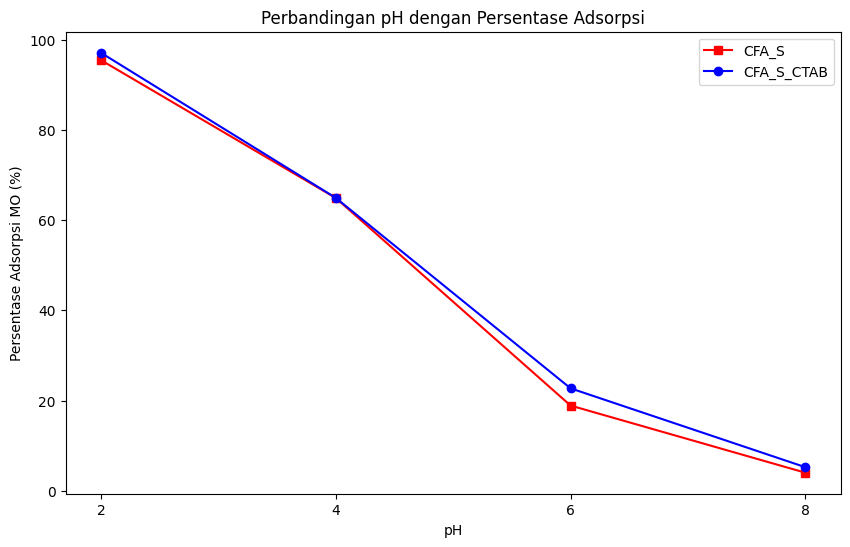

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
file_path_cfa_s = 'C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_PH_CFA_S.xlsx'
file_path_cfa_s_ctab = 'C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_PH_CFA_S_CTAB.xlsx'

df_cfa_s = pd.read_excel(file_path_cfa_s)
df_cfa_s_ctab = pd.read_excel(file_path_cfa_s_ctab)

# Define x-axis values for CFA_S
x_values_cfa_s = ['2', '4', '6', '8']

# Define x-axis values for CFA_S_CTAB
x_values_cfa_s_ctab = ['2', '4', '6', '8']

# Create the plot
plt.figure(figsize=(10, 6))

# Line plot for CFA_S
plt.plot(x_values_cfa_s, df_cfa_s['Adsorption_Percentage'], label='CFA_S', marker='s', color="red")

# Line plot for CFA_S_CTAB
plt.plot(x_values_cfa_s_ctab, df_cfa_s_ctab['Adsorption_Percentage'], label='CFA_S_CTAB', marker='o', color="blue")

# Set labels and title
plt.xlabel('pH')
plt.ylabel('Persentase Adsorpsi MO (%)')
plt.title('Perbandingan pH dengan Persentase Adsorpsi')

# Show legend
plt.legend()

# Show the plot
plt.show()


#### **Summary**

1. Optimum Mass:
   - CFA_S: 0.1 gr
   - CFA_S_CTAB: 0.1 gr
2. Optimum time:
   - CFA_S: 60 minutes
   - CFA_S_CTAB: 60 minutes
3. Optimum IC:
   - CFA_S: 5 ppm
   - CFA_S_CTAB: 5 ppm
4. Optimum PH:
   - CFA_S: 2
   - CFA_S_CTAB: 2

## 3. Kinetika Adsorpsi

#### 1. Isoterm Adsorption Kinetics

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load datasets
df_cfa_s = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_IC_CFA_S.xlsx')
df_cfa_s_ctab = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_IC_CFA_S_CTAB.xlsx')

df_cfa_s.head()

,IC,adsorbance,Cremaining,Cadsorbed,qe,Adsorption_Percentage,1/qe,1/Cremaining,Log qe,Log Crem
0,5,0.045251,0.050311,4.949689,0.494969,98.993787,2.020329,19.876507,-0.703260,-2.989538
1,10,0.049027,0.124793,9.875207,0.987521,98.752071,1.012637,8.013276,-0.012558,-2.081100
2,20,0.061179,0.364485,19.635515,1.963551,98.177574,0.509281,2.743596,0.674755,-1.009269
3,40,0.082463,0.784284,39.215716,3.921572,98.039290,0.255000,1.275048,1.366492,-0.242984
4,60,0.141572,1.950142,58.049858,5.804986,96.749763,0.172266,0.512783,1.758717,0.667902


In [232]:
df_cfa_s_ctab.head()

,IC,adsorbance,Cremaining,Cadsorbed,qe,Adsorption_Percentage,1/qe,1/Cremaining,Log qe,Log Crem
0,5,0.043621,0.018157,4.981843,0.498184,99.636864,2.007289,55.075770,-0.696785,-4.008710
1,10,0.044860,0.042609,9.957391,0.995739,99.573905,1.004279,23.468963,-0.004270,-3.155679
2,20,0.049301,0.130189,19.869811,1.986981,99.349053,0.503276,7.681120,0.686616,-2.038765
3,40,0.059868,0.338627,39.661373,3.966137,99.153432,0.252134,2.953100,1.377793,-1.082855
4,60,0.087639,0.886367,59.113633,5.911363,98.522722,0.169166,1.128201,1.776876,-0.120624


**A. Langmuir**

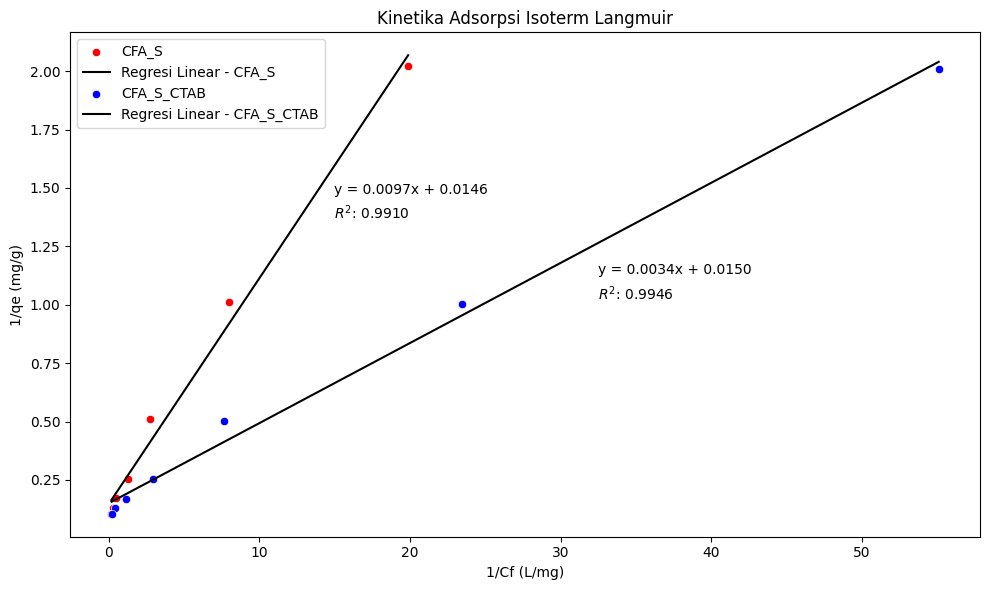

In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load datasets
df_cfa_s = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_IC_CFA_S.xlsx')
df_cfa_s_ctab = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_IC_CFA_S_CTAB.xlsx')

# Define function for plotting and regression
def plot_and_regression(ax, df, title, label, color):
    X = df['1/Cremaining']
    Y = df['1/qe']

    # Reshape X to a 2D array
    X = X.values.reshape(-1, 1)

    # Create linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Make predictions
    Y_pred = model.predict(X)

    # Plotting
    sns.scatterplot(x=X.flatten(), y=Y, label=f'{label}', ax=ax, marker='o', color=color)
    sns.lineplot(x=X.flatten(), y=Y_pred, color='black', label=f'Regresi Linear - {label}', ax=ax)
    ax.set_xlabel('1/Cf (L/mg)')
    ax.set_ylabel('1/qe (mg/g)')
    ax.set_title('Kinetika Adsorpsi Isoterm Langmuir')

    # Annotate with regression equation and R-squared
    equation_text = f'y = {0.1*model.coef_[0]:.4f}x + {0.1*model.intercept_:.4f}'
    r2_text = f'$R^2$: {r2_score(Y, Y_pred):.4f}'
    
    # Position the text annotations based on the dataset
    text_x_position = 0.29 if label == 'CFA_S' else 0.58
    text_y_position = 0.68 if label == 'CFA_S' else 0.52
    
    ax.text(text_x_position, text_y_position, equation_text, transform=ax.transAxes, fontsize=10, ha='left')
    ax.text(text_x_position, text_y_position - 0.05, r2_text, transform=ax.transAxes, fontsize=10, ha='left')

    ax.legend()

# Set up subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and analyze for the first dataset (CFA_S)
plot_and_regression(ax, df_cfa_s, 'Dataset - CFA_S', label='CFA_S', color='red')

# Plot and analyze for the second dataset (CFA_S_CTAB)
plot_and_regression(ax, df_cfa_s_ctab, 'Dataset - CFA_S_CTAB', label='CFA_S_CTAB', color='blue')

plt.tight_layout()
plt.show()


**B. Freundlich**

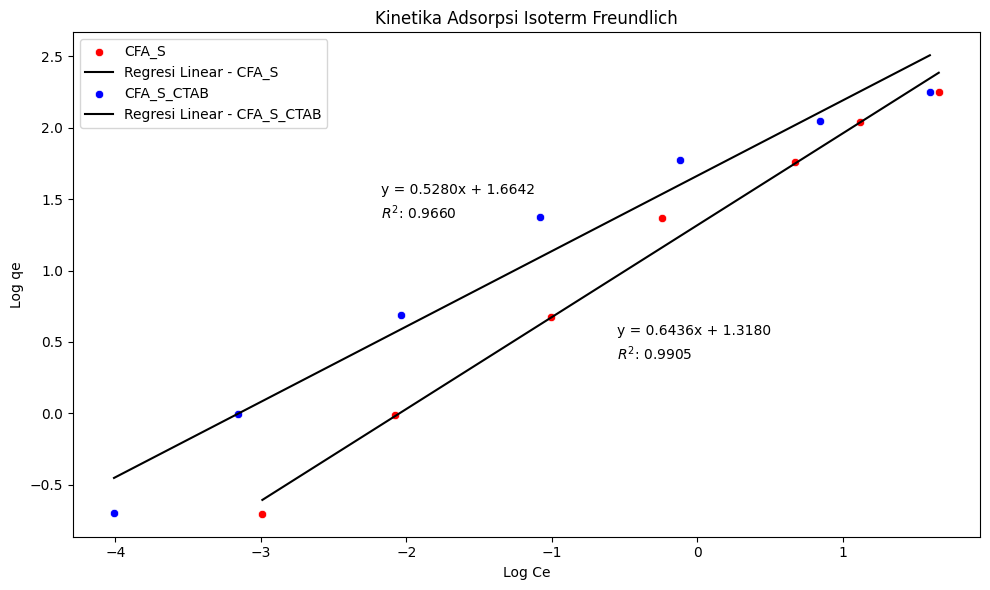

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load datasets
df_cfa_s = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_IC_CFA_S.xlsx')
df_cfa_s_ctab = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_IC_CFA_S_CTAB.xlsx')

# Define function for plotting and regression
def plot_and_regression(ax, df, title, label, color):
    X = df['Log Crem']
    Y = df['Log qe']

    # Reshape X to a 2D array
    X = X.values.reshape(-1, 1)

    # Create linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Make predictions
    Y_pred = model.predict(X)

    # Plotting
    sns.scatterplot(x=X.flatten(), y=Y, label=f'{label}', ax=ax, marker='o', color=color)
    sns.lineplot(x=X.flatten(), y=Y_pred, color='black', label=f'Regresi Linear - {label}', ax=ax)
    ax.set_xlabel('Log Ce')
    ax.set_ylabel('Log qe')
    ax.set_title('Kinetika Adsorpsi Isoterm Freundlich')

    # Annotate with regression equation and R-squared
    equation_text = f'y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}'
    r2_text = f'$R^2$: {r2_score(Y, Y_pred):.4f}'
    
    # Position the text annotations based on the dataset
    text_x_position = 0.6 if label == 'CFA_S' else 0.34
    text_y_position = 0.4 if label == 'CFA_S' else 0.68
    
    ax.text(text_x_position, text_y_position, equation_text, transform=ax.transAxes, fontsize=10, ha='left')
    ax.text(text_x_position, text_y_position - 0.05, r2_text, transform=ax.transAxes, fontsize=10, ha='left')

    ax.legend()

# Set up subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and analyze for the first dataset (CFA_S)
plot_and_regression(ax, df_cfa_s, 'Dataset - CFA_S', label='CFA_S', color='red')

# Plot and analyze for the second dataset (CFA_S_CTAB)
plot_and_regression(ax, df_cfa_s_ctab, 'Dataset - CFA_S_CTAB', label='CFA_S_CTAB', color='blue')

plt.tight_layout()
plt.show()


#### 2. Dynamics Adsorption Kinetics

**A. Data Prep-Analysis CFA_S**

In [217]:
##load Dataset
import pandas as pd

# Load your dataset from Excel file
df = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/Time_CFA_S.xlsx')
df.head()

,time,adsorbance
0,15,0.298288
1,30,0.250408
2,45,0.200020
3,60,0.123868
4,75,0.120448


In [219]:
import numpy as np

# Linear Regression Equation: y = 0.0507x + 0.0427
# Calculate Cf using the regression equation
df['Cremaining'] = (df['adsorbance'] - 0.0427) / 0.0507

# Calculate Cadsorbed (initial C - Cf)
initial_C = 40
df['Cadsorbed'] = initial_C - df['Cremaining']

# Calculate percentage of adsorption (Cadsorbed / initial C * 100%)
df['Adsorption_Percentage'] = (df['Cadsorbed'] / initial_C) * 100

# Calculate ['qt'] = (Cadsorbed * 0.01) / 0.1
df['qt'] = ((40 - df['Cremaining']) * 0.01) / 0.1

# Constants from Concentration Variation
df['qe'] = 3.921572

# ['Ln qe-qt'] = ln(QE-qt)
df['Ln qe-qt'] = np.log(df['qe'] - df['qt'])

# ['t/qt'] = time / qt
df['t/qt'] = df['time'] / df['qt']

# ['t^1/2'] = sqrt time
df['t^1/2'] = np.sqrt(df['time'])

# Export the data to a new Excel file
df.to_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/KineticsIsoterm_CFA_S.xlsx', index=False)

# Print the first few rows of the resulting DataFrame
df.head()


,time,adsorbance,Cremaining,Cadsorbed,Adsorption_Percentage,qt,qe,Ln qe-qt,t/qt,t^1/2
0,15,0.298288,5.041183,34.958817,87.397041,3.495882,3.921572,-0.854043,4.290763,3.872983
1,30,0.250408,4.096805,35.903195,89.757988,3.590320,3.921572,-1.104874,8.355802,5.477226
2,45,0.200020,3.102959,36.897041,92.242604,3.689704,3.921572,-1.461588,12.196100,6.708204
3,60,0.123868,1.600947,38.399053,95.997633,3.839905,3.921572,-2.505109,15.625385,7.745967
4,75,0.120448,1.533491,38.466509,96.166272,3.846651,3.921572,-2.591320,19.497480,8.660254


**B.Data Prep-Analysis CFA_S_CTAB**

In [220]:
##load Dataset
import pandas as pd

# Load your dataset from Excel file
df = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/Time_CFA_S_CTAB.xlsx')
df.head()

,time,adsorbance
0,15,0.230344
1,30,0.175396
2,45,0.123184
3,60,0.083512
4,75,0.081232


In [221]:
import numpy as np

# Linear Regression Equation: y = 0.0507x + 0.0427
# Calculate Cf using the regression equation
df['Cremaining'] = (df['adsorbance'] - 0.0427) / 0.0507

# Calculate Cadsorbed (initial C - Cf)
initial_C = 40
df['Cadsorbed'] = initial_C - df['Cremaining']

# Calculate percentage of adsorption (Cadsorbed / initial C * 100%)
df['Adsorption_Percentage'] = (df['Cadsorbed'] / initial_C) * 100

# Calculate ['qt'] = (Cadsorbed * 0.01) / 0.1
df['qt'] = ((40 - df['Cremaining']) * 0.01) / 0.1

# Constants from Concentration Variation
df['qe'] = 3.966137	

# ['Ln qe-qt'] = ln(QE-qt)
df['Ln qe-qt'] = np.log(df['qe'] - df['qt'])

# ['t/qt'] = time / qt
df['t/qt'] = df['time'] / df['qt']

# ['t^1/2'] = sqrt time
df['t^1/2'] = np.sqrt(df['time'])

# Export the data to a new Excel file
df.to_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/KineticsIsoterm_CFA_S_CTAB.xlsx', index=False)

# Print the first few rows of the resulting DataFrame
df.head()


,time,adsorbance,Cremaining,Cadsorbed,Adsorption_Percentage,qt,qe,Ln qe-qt,t/qt,t^1/2
0,15,0.230344,3.701065,36.298935,90.747337,3.629893,3.966137,-1.089920,4.132353,3.872983
1,30,0.175396,2.617278,37.382722,93.456805,3.738272,3.966137,-1.479003,8.025098,5.477226
2,45,0.123184,1.587456,38.412544,96.031361,3.841254,3.966137,-2.080381,11.714923,6.708204
3,60,0.083512,0.804970,39.195030,97.987574,3.919503,3.966137,-3.065425,15.308063,7.745967
4,75,0.081232,0.760000,39.240000,98.100000,3.924000,3.966137,-3.166829,19.113150,8.660254


**A. Pseudo First Order Lagergren**

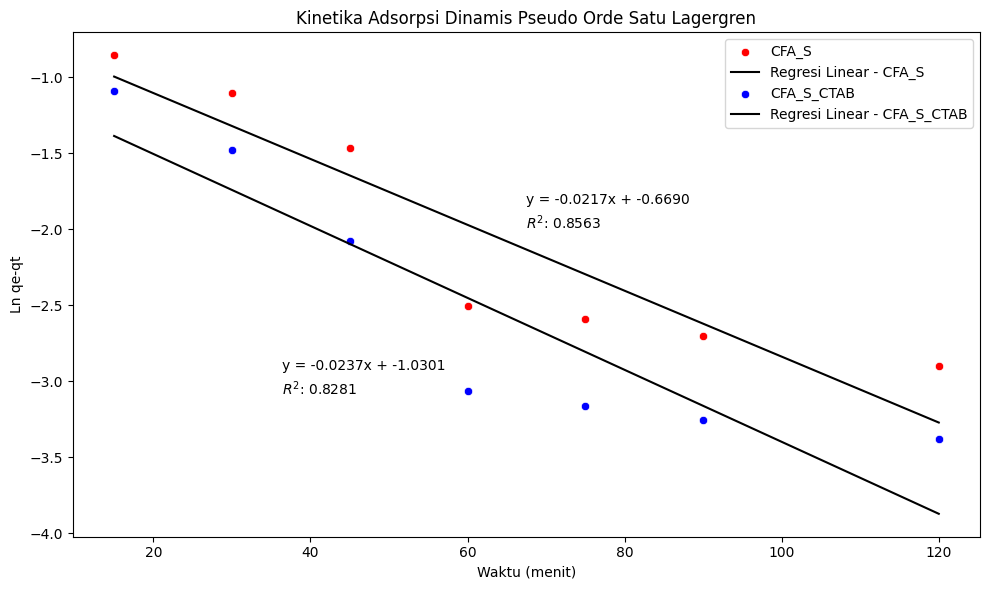

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load datasets
df_cfa_s = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/KineticsIsoterm_CFA_S.xlsx')
df_cfa_s_ctab = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/KineticsIsoterm_CFA_S_CTAB.xlsx')

# Define function for plotting and regression
def plot_and_regression(ax, df, title, label, color):
    X = df['time']
    Y = df['Ln qe-qt']

    # Reshape X to a 2D array
    X = X.values.reshape(-1, 1)

    # Create linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Make predictions
    Y_pred = model.predict(X)

    # Plotting
    sns.scatterplot(x=X.flatten(), y=Y, label=f'{label}', ax=ax, marker='o', color=color)
    sns.lineplot(x=X.flatten(), y=Y_pred, color='black', label=f'Regresi Linear - {label}', ax=ax)
    ax.set_xlabel('Waktu (menit)')
    ax.set_ylabel('Ln qe-qt')
    ax.set_title('Kinetika Adsorpsi Dinamis Pseudo Orde Satu Lagergren')

    # Annotate with regression equation and R-squared
    equation_text = f'y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}'
    r2_text = f'$R^2$: {r2_score(Y, Y_pred):.4f}'
    
    # Position the text annotations based on the dataset
    text_x_position = 0.5 if label == 'CFA_S' else 0.23
    text_y_position = 0.66 if label == 'CFA_S' else 0.33
    
    ax.text(text_x_position, text_y_position, equation_text, transform=ax.transAxes, fontsize=10, ha='left')
    ax.text(text_x_position, text_y_position - 0.05, r2_text, transform=ax.transAxes, fontsize=10, ha='left')

    ax.legend()

# Set up subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and analyze for the first dataset (CFA_S)
plot_and_regression(ax, df_cfa_s, 'Dataset - CFA_S', label='CFA_S', color='red')

# Plot and analyze for the second dataset (CFA_S_CTAB)
plot_and_regression(ax, df_cfa_s_ctab, 'Dataset - CFA_S_CTAB', label='CFA_S_CTAB', color='blue')

plt.tight_layout()
plt.show()


**B. Pseudo Second Order Ho**

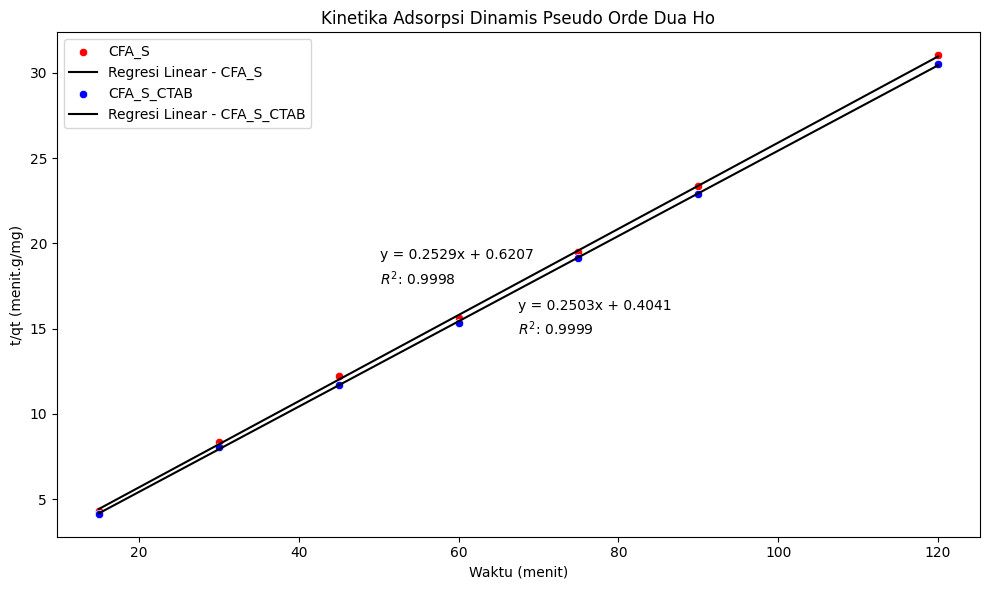

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load datasets
df_cfa_s = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/KineticsIsoterm_CFA_S.xlsx')
df_cfa_s_ctab = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/KineticsIsoterm_CFA_S_CTAB.xlsx')

# Define function for plotting and regression
def plot_and_regression(ax, df, title, label, color):
    X = df['time']
    Y = df['t/qt']

    # Reshape X to a 2D array
    X = X.values.reshape(-1, 1)

    # Create linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Make predictions
    Y_pred = model.predict(X)

    # Plotting
    sns.scatterplot(x=X.flatten(), y=Y, label=f'{label}', ax=ax, marker='o', color=color)
    sns.lineplot(x=X.flatten(), y=Y_pred, color='black', label=f'Regresi Linear - {label}', ax=ax)
    ax.set_xlabel('Waktu (menit)')
    ax.set_ylabel('t/qt (menit.g/mg)')
    ax.set_title('Kinetika Adsorpsi Dinamis Pseudo Orde Dua Ho')

    # Annotate with regression equation and R-squared
    equation_text = f'y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}'
    r2_text = f'$R^2$: {r2_score(Y, Y_pred):.4f}'
    
    # Position the text annotations based on the dataset
    text_x_position = 0.35 if label == 'CFA_S' else 0.5
    text_y_position = 0.55 if label == 'CFA_S' else 0.45
    
    ax.text(text_x_position, text_y_position, equation_text, transform=ax.transAxes, fontsize=10, ha='left')
    ax.text(text_x_position, text_y_position - 0.05, r2_text, transform=ax.transAxes, fontsize=10, ha='left')

    ax.legend()

# Set up subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and analyze for the first dataset (CFA_S)
plot_and_regression(ax, df_cfa_s, 'Dataset - CFA_S', label='CFA_S', color='red')

# Plot and analyze for the second dataset (CFA_S_CTAB)
plot_and_regression(ax, df_cfa_s_ctab, 'Dataset - CFA_S_CTAB', label='CFA_S_CTAB', color='blue')

plt.tight_layout()
plt.show()


#### 3. Intraparticel Adsorption

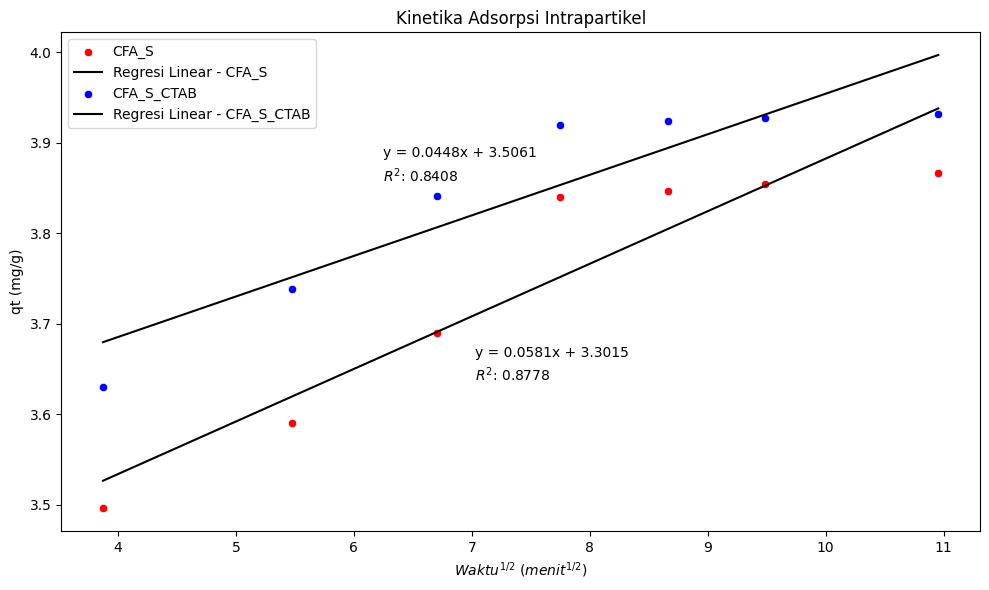

In [492]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load datasets
df_cfa_s = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/KineticsIsoterm_CFA_S.xlsx')
df_cfa_s_ctab = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/KineticsIsoterm_CFA_S_CTAB.xlsx')

# Define function for plotting and regression
def plot_and_regression(ax, df, title, label, color):
    X = df['t^1/2']
    Y = df['qt']

    # Reshape X to a 2D array
    X = X.values.reshape(-1, 1)

    # Create linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Make predictions
    Y_pred = model.predict(X)

    # Plotting
    sns.scatterplot(x=X.flatten(), y=Y, label=f'{label}', ax=ax, marker='o', color=color)
    sns.lineplot(x=X.flatten(), y=Y_pred, color='black', label=f'Regresi Linear - {label}', ax=ax)
    ax.set_xlabel('$Waktu^{1/2}$ ($menit^{1/2}$)')
    ax.set_ylabel('qt (mg/g)')
    ax.set_title('Kinetika Adsorpsi Intrapartikel')

    # Annotate with regression equation and R-squared
    equation_text = f'y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}'
    r2_text = f'$R^2$: {r2_score(Y, Y_pred):.4f}'
    
    # Position the text annotations based on the dataset
    text_x_position = 0.45 if label == 'CFA_S' else 0.35
    text_y_position = 0.35 if label == 'CFA_S' else 0.75
    
    ax.text(text_x_position, text_y_position, equation_text, transform=ax.transAxes, fontsize=10, ha='left')
    ax.text(text_x_position, text_y_position - 0.05, r2_text, transform=ax.transAxes, fontsize=10, ha='left')

    ax.legend()

# Set up subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and analyze for the first dataset (CFA_S)
plot_and_regression(ax, df_cfa_s, 'Dataset - CFA_S', label='CFA_S', color='red')

# Plot and analyze for the second dataset (CFA_S_CTAB)
plot_and_regression(ax, df_cfa_s_ctab, 'Dataset - CFA_S_CTAB', label='CFA_S_CTAB', color='blue')

plt.tight_layout()
plt.show()


## 4. Thermodynamics Study

**Data Processing**

In [478]:
##load Dataset
import pandas as pd

# Load your dataset from Excel file
df = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/Thermodynamics_CFA_S.xlsx')
df.head()

,IC,A_308,A_318,A_328
0,5,0.051714,0.050401,0.048146
1,10,0.062919,0.061168,0.057168
2,20,0.083154,0.089326,0.085392
3,40,0.137552,0.151684,0.131684
4,60,0.207024,0.228064,0.138064


In [479]:
import numpy as np

# Linear Regression Equation: y = 0.0507x + 0.0427
# Calculate Cf using the regression equation
df['Cremaining_308'] = (df['A_308'] - 0.0427) / 0.0507
df['Cremaining_318'] = (df['A_318'] - 0.0427) / 0.0507
df['Cremaining_328'] = (df['A_328'] - 0.0427) / 0.0507

# Calculate Cadsorbed (initial C - Cf)
initial_C = df['IC']
df['Cadsorbed_308'] = initial_C - df['Cremaining_308']
df['Cadsorbed_318'] = initial_C - df['Cremaining_318']
df['Cadsorbed_328'] = initial_C - df['Cremaining_328']

# Calculate percentage of adsorption (Cadsorbed / initial C * 100%)
df['%_308'] = (df['Cadsorbed_308'] / initial_C) * 100
df['%_318'] = (df['Cadsorbed_318'] / initial_C) * 100
df['%_328'] = (df['Cadsorbed_328'] / initial_C) * 100

# Calculate ['qe'] = (Cadsorbed * 0.01) / 0.1
df['qe308'] = ((df['IC']-df['Cremaining_308']) * 0.01) / 0.1
df['qe318'] = ((df['IC']-df['Cremaining_318']) * 0.01) / 0.1
df['qe328'] = ((df['IC']-df['Cremaining_328']) * 0.01) / 0.1

# Calculate ['1/qe'] and ['1/Cads']
df['308_1/qe'] = 1 / df['qe308']
df['318_1/qe'] = 1 / df['qe318']
df['328_1/qe'] = 1 / df['qe328']

df['308_1/Cremaining'] = 1 / df['Cremaining_308']
df['318_1/Cremaining'] = 1 / df['Cremaining_318']
df['328_1/Cremaining'] = 1 / df['Cremaining_328']

# Calculate logarithmic values
df['308_Log qe'] = np.log(df['qe308'])
df['318_Log qe'] = np.log(df['qe318'])
df['328_Log qe'] = np.log(df['qe328'])

df['308_Log Crem'] = np.log(df['Cremaining_308'])
df['318_Log Crem'] = np.log(df['Cremaining_318'])
df['328_Log Crem'] = np.log(df['Cremaining_328'])

# Export the data to a new Excel file
df.to_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_Thermodynamics_CFA_S.xlsx', index=False)

# Print the first few rows of the resulting DataFrame
df.head()


,IC,A_308,A_318,A_328,Cremaining_308,Cremaining_318,Cremaining_328,Cadsorbed_308,Cadsorbed_318,Cadsorbed_328,...,328_1/qe,308_1/Cremaining,318_1/Cremaining,328_1/Cremaining,308_Log qe,318_Log qe,328_Log qe,308_Log Crem,318_Log Crem,328_Log Crem
0,5,0.051714,0.050401,0.048146,0.177781,0.151888,0.107416,4.822219,4.848112,4.892584,...,2.043910,5.624896,6.583817,9.309585,-0.729351,-0.723996,-0.714865,-1.727202,-1.884615,-2.231045
1,10,0.062919,0.061168,0.057168,0.398797,0.364260,0.285365,9.601203,9.635740,9.714635,...,1.029375,2.507542,2.745289,3.504285,-0.040697,-0.037106,-0.028952,-0.919303,-1.009886,-1.253987
2,20,0.083154,0.089326,0.085392,0.797909,0.919645,0.842051,19.202091,19.080355,19.157949,...,0.521977,1.253275,1.087376,1.187576,0.652434,0.646074,0.650133,-0.225760,-0.083768,-0.171914
3,40,0.137552,0.151684,0.131684,1.870848,2.149586,1.755108,38.129152,37.850414,38.244892,...,0.261473,0.534517,0.465206,0.569765,1.338394,1.331057,1.341425,0.626392,0.765275,0.562531
4,60,0.207024,0.228064,0.138064,3.241105,3.656095,1.880947,56.758895,56.343905,58.119053,...,0.172061,0.308537,0.273516,0.531647,1.736227,1.728889,1.759908,1.175914,1.296396,0.631775


In [480]:
##load Dataset
import pandas as pd

# Load your dataset from Excel file
df = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/Thermodynamics_CFA_S_CTAB.xlsx')
df.head()

,IC,A_308,A_318,A_328
0,5,0.052401,0.048714,0.046376
1,10,0.065168,0.059059,0.052561
2,20,0.093260,0.079294,0.069490
3,40,0.171684,0.126832,0.111054
4,60,0.318064,0.196942,0.164452


In [481]:
import numpy as np

# Linear Regression Equation: y = 0.0507x + 0.0427
# Calculate Cf using the regression equation
df['Cremaining_308'] = (df['A_308'] - 0.0427) / 0.0507
df['Cremaining_318'] = (df['A_318'] - 0.0427) / 0.0507
df['Cremaining_328'] = (df['A_328'] - 0.0427) / 0.0507

# Calculate Cadsorbed (initial C - Cf)
initial_C = df['IC']
df['Cadsorbed_308'] = initial_C - df['Cremaining_308']
df['Cadsorbed_318'] = initial_C - df['Cremaining_318']
df['Cadsorbed_328'] = initial_C - df['Cremaining_328']

# Calculate percentage of adsorption (Cadsorbed / initial C * 100%)
df['%_308'] = (df['Cadsorbed_308'] / initial_C) * 100
df['%_318'] = (df['Cadsorbed_318'] / initial_C) * 100
df['%_328'] = (df['Cadsorbed_328'] / initial_C) * 100

# Calculate ['qe'] = (Cadsorbed * 0.01) / 0.1
df['qe308'] = ((df['IC']-df['Cremaining_308']) * 0.01) / 0.1
df['qe318'] = ((df['IC']-df['Cremaining_318']) * 0.01) / 0.1
df['qe328'] = ((df['IC']-df['Cremaining_328']) * 0.01) / 0.1

# Calculate ['1/qe'] and ['1/Cads']
df['308_1/qe'] = 1 / df['qe308']
df['318_1/qe'] = 1 / df['qe318']
df['328_1/qe'] = 1 / df['qe328']

df['308_1/Cremaining'] = 1 / df['Cremaining_308']
df['318_1/Cremaining'] = 1 / df['Cremaining_318']
df['328_1/Cremaining'] = 1 / df['Cremaining_328']

# Calculate logarithmic values
df['308_Log qe'] = np.log(df['qe308'])
df['318_Log qe'] = np.log(df['qe318'])
df['328_Log qe'] = np.log(df['qe328'])

df['308_Log Crem'] = np.log(df['Cremaining_308'])
df['318_Log Crem'] = np.log(df['Cremaining_318'])
df['328_Log Crem'] = np.log(df['Cremaining_328'])

# Export the data to a new Excel file
df.to_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_Thermodynamics_CFA_S_CTAB.xlsx', index=False)

# Print the first few rows of the resulting DataFrame
df.head()

,IC,A_308,A_318,A_328,Cremaining_308,Cremaining_318,Cremaining_328,Cadsorbed_308,Cadsorbed_318,Cadsorbed_328,...,328_1/qe,308_1/Cremaining,318_1/Cremaining,328_1/Cremaining,308_Log qe,318_Log qe,328_Log qe,308_Log Crem,318_Log Crem,328_Log Crem
0,5,0.052401,0.048714,0.046376,0.191335,0.118609,0.072515,4.808665,4.881391,4.927485,...,2.029433,5.226427,8.431030,13.790290,-0.732166,-0.717155,-0.707756,-1.653728,-2.131919,-2.623965
1,10,0.065168,0.059059,0.052561,0.443156,0.322663,0.194497,9.556844,9.677337,9.805503,...,1.019835,2.256543,3.099211,5.141466,-0.045328,-0.032798,-0.019641,-0.813834,-1.131148,-1.637338
2,20,0.093260,0.079294,0.069490,0.997239,0.721775,0.528402,19.002761,19.278225,19.471598,...,0.513569,1.002769,1.385473,1.892497,0.641999,0.656391,0.666372,-0.002765,-0.326042,-0.637897
3,40,0.171684,0.126832,0.111054,2.544063,1.659408,1.348213,37.455937,38.340592,38.651787,...,0.258720,0.393072,0.602624,0.741723,1.320580,1.343924,1.352008,0.933762,0.506461,0.298780
4,60,0.318064,0.196942,0.164452,5.431243,3.042249,2.401420,54.568757,56.957751,57.598580,...,0.173615,0.184120,0.328704,0.416420,1.696876,1.739725,1.750913,1.692168,1.112597,0.876060


**A. Langmuir Curve at Every Temperature**

Dataset - CFA_S (308 K) Regression:
   y = 0.0361x + 0.0071
   R-squared: 0.9982

Dataset - CFA_S (318 K) Regression:
   y = 0.0302x + 0.0121
   R-squared: 0.9934

Dataset - CFA_S (328 K) Regression:
   y = 0.0211x + 0.0142
   R-squared: 0.9809



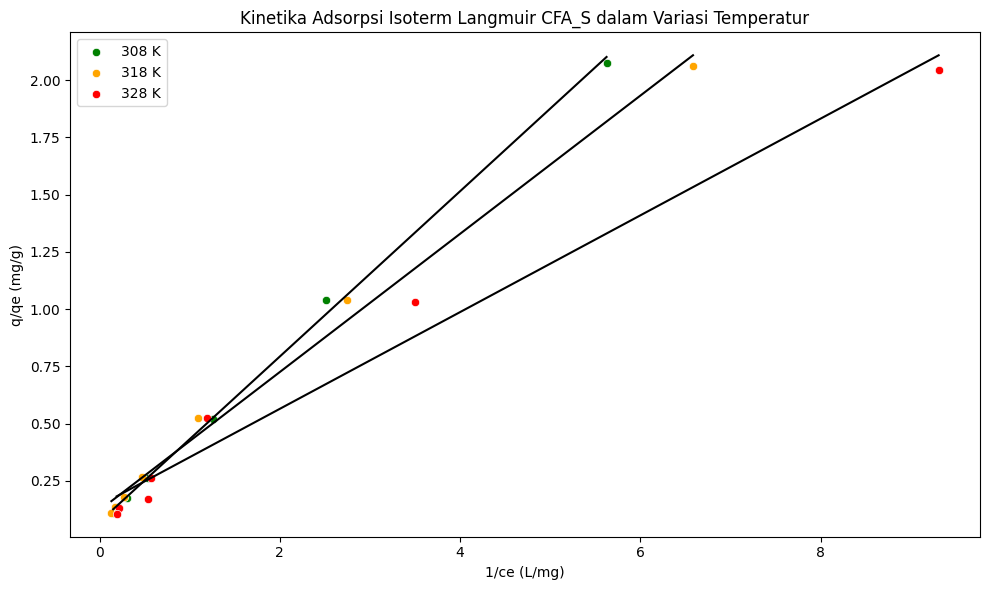

In [482]:
# CFA_S
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load datasets
df_cfa_s = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_Thermodynamics_CFA_S.xlsx')

# Define function for plotting and regression
def plot_and_regression(ax, df, x_column, y_column, title, label, color):
    X = df[x_column]
    Y = df[y_column]

    # Reshape X to a 2D array
    X = X.values.reshape(-1, 1)

    # Create linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Make predictions
    Y_pred = model.predict(X)

    # Plotting
    sns.scatterplot(x=X.flatten(), y=Y, label=f'{label}', ax=ax, marker='o', color=color)
    sns.lineplot(x=X.flatten(), y=Y_pred, color='black')
    ax.set_xlabel(f'1/ce (L/mg)')
    ax.set_ylabel(f'q/qe (mg/g)')
    ax.set_title('Kinetika Adsorpsi Isoterm Langmuir CFA_S dalam Variasi Temperatur')
    ax.legend()

    # Print regression equation and R-squared
    equation_text = f'y = {0.1*model.coef_[0]:.4f}x + {0.1*model.intercept_:.4f}'
    r2_text = f'R-squared: {r2_score(Y, Y_pred):.4f}'
    
    print(f'{title} Regression:')
    print(f'   {equation_text}')
    print(f'   {r2_text}\n')

# Set up subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and analyze for the first dataset (CFA_S)
plot_and_regression(ax, df_cfa_s, '308_1/Cremaining', '308_1/qe', 'Dataset - CFA_S (308 K)', label='308 K', color='green')

# Repeat for other pairs of columns (318 and 328)
plot_and_regression(ax, df_cfa_s, '318_1/Cremaining', '318_1/qe', 'Dataset - CFA_S (318 K)', label='318 K', color='orange')
plot_and_regression(ax, df_cfa_s, '328_1/Cremaining', '328_1/qe', 'Dataset - CFA_S (328 K)', label='328 K', color='red')

plt.tight_layout()
plt.show()


Dataset - CFA_S_CTAB (308 K) Regression:
   y = 0.0383x + 0.0112
   R-squared: 0.9969

Dataset - CFA_S_CTAB (318 K) Regression:
   y = 0.0235x + 0.0133
   R-squared: 0.9851

Dataset - CFA_S_CTAB (328 K) Regression:
   y = 0.0141x + 0.0154
   R-squared: 0.9854



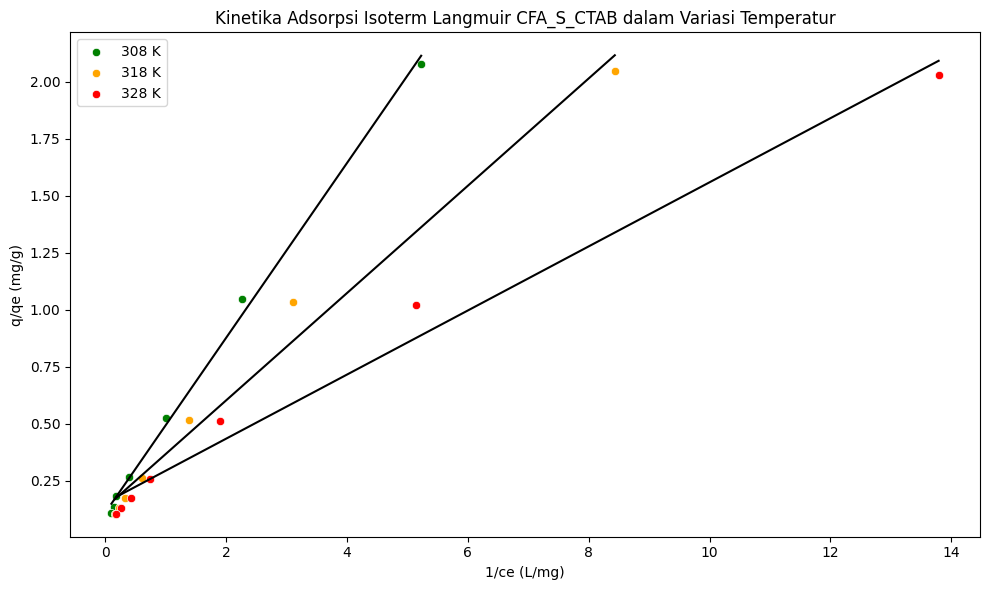

In [484]:
# CFA_S_CTAB
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load datasets
df_cfa_s_ctab = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_Thermodynamics_CFA_S_CTAB.xlsx')

# Define function for plotting and regression
def plot_and_regression(ax, df, x_column, y_column, title, label, color):
    X = df[x_column]
    Y = df[y_column]

    # Reshape X to a 2D array
    X = X.values.reshape(-1, 1)

    # Create linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Make predictions
    Y_pred = model.predict(X)

    # Plotting
    sns.scatterplot(x=X.flatten(), y=Y, label=f'{label}', ax=ax, marker='o', color=color)
    sns.lineplot(x=X.flatten(), y=Y_pred, color='black')
    ax.set_xlabel(f'1/ce (L/mg)')
    ax.set_ylabel(f'q/qe (mg/g)')
    ax.set_title('Kinetika Adsorpsi Isoterm Langmuir CFA_S_CTAB dalam Variasi Temperatur')
    ax.legend()

    # Print regression equation and R-squared
    equation_text = f'y = {0.1*model.coef_[0]:.4f}x + {0.1*model.intercept_:.4f}'
    r2_text = f'R-squared: {r2_score(Y, Y_pred):.4f}'
    
    print(f'{title} Regression:')
    print(f'   {equation_text}')
    print(f'   {r2_text}\n')

# Set up subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and analyze for the second dataset (CFA_S_CTAB)
plot_and_regression(ax, df_cfa_s_ctab, '308_1/Cremaining', '308_1/qe', 'Dataset - CFA_S_CTAB (308 K)', label='308 K', color='green')

# Repeat for other pairs of columns (318 and 328)
plot_and_regression(ax, df_cfa_s_ctab, '318_1/Cremaining', '318_1/qe', 'Dataset - CFA_S_CTAB (318 K)', label='318 K', color='orange')
plot_and_regression(ax, df_cfa_s_ctab, '328_1/Cremaining', '328_1/qe', 'Dataset - CFA_S_CTAB (328 K)', label='328 K', color='red')

plt.tight_layout()
plt.show()


**B. Freundlich Curve at Every Temperature**

Dataset - CFA_S (308 K) Regression:
   y = 0.8191x + 0.7447
   R-squared: 0.9964

Dataset - CFA_S (318 K) Regression:
   y = 0.7543x + 0.7166
   R-squared: 0.9994

Dataset - CFA_S (328 K) Regression:
   y = 0.7647x + 0.9568
   R-squared: 0.9794



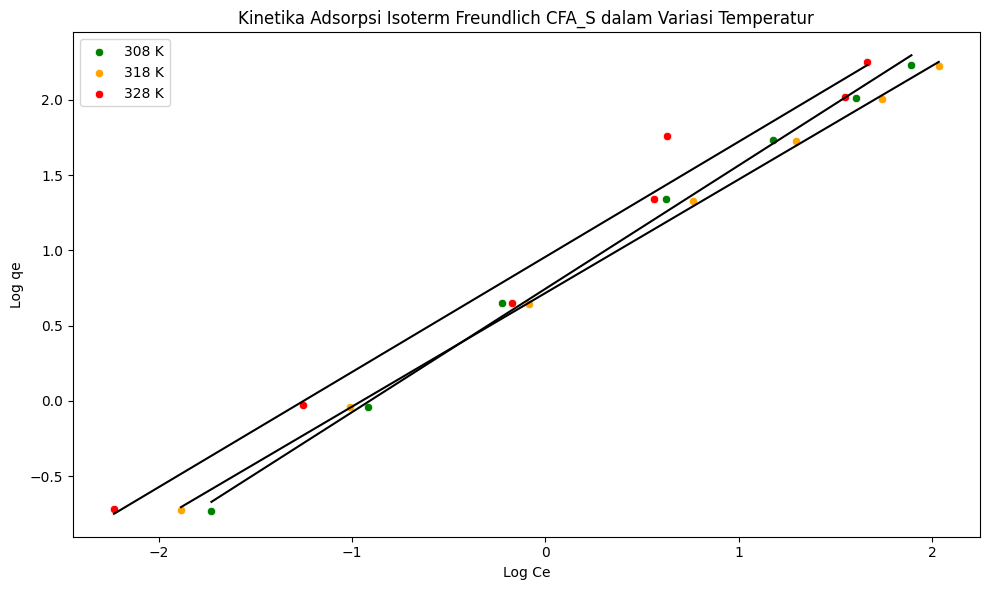

In [493]:
# CFA_S
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load datasets
df_cfa_s_ctab = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_Thermodynamics_CFA_S.xlsx')

# Define function for plotting and regression
def plot_and_regression(ax, df, x_column, y_column, title, label, color):
    X = df[x_column]
    Y = df[y_column]

    # Reshape X to a 2D array
    X = X.values.reshape(-1, 1)

    # Create linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Make predictions
    Y_pred = model.predict(X)

    # Plotting
    sns.scatterplot(x=X.flatten(), y=Y, label=f'{label}', ax=ax, marker='o', color=color)
    sns.lineplot(x=X.flatten(), y=Y_pred, color='black')
    ax.set_xlabel(f'Log Ce')
    ax.set_ylabel(f'Log qe')
    ax.set_title('Kinetika Adsorpsi Isoterm Freundlich CFA_S dalam Variasi Temperatur')
    ax.legend()

    # Print regression equation and R-squared
    equation_text = f'y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}'
    r2_text = f'R-squared: {r2_score(Y, Y_pred):.4f}'
    
    print(f'{title} Regression:')
    print(f'   {equation_text}')
    print(f'   {r2_text}\n')

# Set up subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and analyze for the second dataset (CFA_S_CTAB)
plot_and_regression(ax, df_cfa_s_ctab, '308_Log Crem', '308_Log qe', 'Dataset - CFA_S (308 K)', label='308 K', color='green')

# Repeat for other pairs of columns (318 and 328)
plot_and_regression(ax, df_cfa_s_ctab, '318_Log Crem', '318_Log qe', 'Dataset - CFA_S (318 K)', label='318 K', color='orange')
plot_and_regression(ax, df_cfa_s_ctab, '328_Log Crem', '328_Log qe', 'Dataset - CFA_S (328 K)', label='328 K', color='red')

plt.tight_layout()
plt.show()


Dataset - CFA_S_CTAB (308 K) Regression:
   y = 0.7343x + 0.5527
   R-squared: 0.9953

Dataset - CFA_S_CTAB (318 K) Regression:
   y = 0.7543x + 0.8833
   R-squared: 0.9982

Dataset - CFA_S_CTAB (328 K) Regression:
   y = 0.6899x + 1.1131
   R-squared: 0.9994



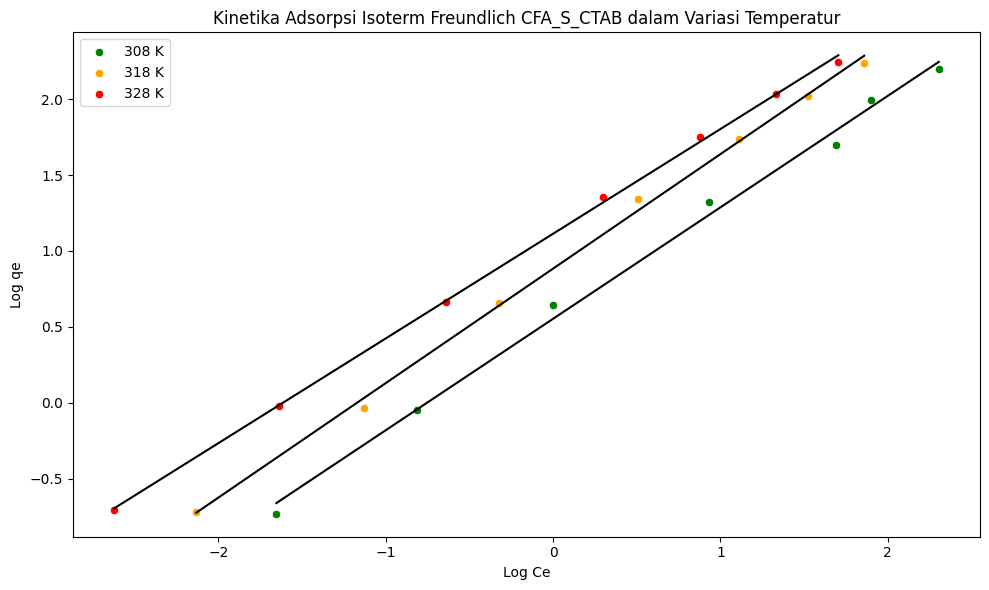

In [494]:
# CFA_S_CTAB
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load datasets
df_cfa_s_ctab = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/output_data_Thermodynamics_CFA_S_CTAB.xlsx')

# Define function for plotting and regression
def plot_and_regression(ax, df, x_column, y_column, title, label, color):
    X = df[x_column]
    Y = df[y_column]

    # Reshape X to a 2D array
    X = X.values.reshape(-1, 1)

    # Create linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Make predictions
    Y_pred = model.predict(X)

    # Plotting
    sns.scatterplot(x=X.flatten(), y=Y, label=f'{label}', ax=ax, marker='o', color=color)
    sns.lineplot(x=X.flatten(), y=Y_pred, color='black')
    ax.set_xlabel(f'Log Ce')
    ax.set_ylabel(f'Log qe')
    ax.set_title('Kinetika Adsorpsi Isoterm Freundlich CFA_S_CTAB dalam Variasi Temperatur')
    ax.legend()

    # Print regression equation and R-squared
    equation_text = f'y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}'
    r2_text = f'R-squared: {r2_score(Y, Y_pred):.4f}'
    
    print(f'{title} Regression:')
    print(f'   {equation_text}')
    print(f'   {r2_text}\n')

# Set up subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and analyze for the second dataset (CFA_S_CTAB)
plot_and_regression(ax, df_cfa_s_ctab, '308_Log Crem', '308_Log qe', 'Dataset - CFA_S_CTAB (308 K)', label='308 K', color='green')

# Repeat for other pairs of columns (318 and 328)
plot_and_regression(ax, df_cfa_s_ctab, '318_Log Crem', '318_Log qe', 'Dataset - CFA_S_CTAB (318 K)', label='318 K', color='orange')
plot_and_regression(ax, df_cfa_s_ctab, '328_Log Crem', '328_Log qe', 'Dataset - CFA_S_CTAB (328 K)', label='328 K', color='red')

plt.tight_layout()
plt.show()


**B. Vant Hoff Plot**

In [488]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Read the data into df_Thermodynamics_Cal
df_Thermodynamics_Cal = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/updated_summary_table.xlsx')
df_Thermodynamics_Cal.head()

,T,S_Intercept,S_Slope,S_qmax,SC_Intercept,SC_Slope,SC_qmax,S_KL,SC_KL,1/T
0,308,0.0071,0.0361,140.845070,0.0112,0.0383,89.285714,0.196676,0.292428,0.003247
1,318,0.0121,0.0302,82.644628,0.0133,0.0235,75.187970,0.400662,0.565957,0.003145
2,328,0.0142,0.0211,70.422535,0.0154,0.0141,64.935065,0.672986,1.092199,0.003049


Regresi Linear (CFA_S): y = -2401.5266x + 7.9804, $R^2$: 0.9899
Regresi Linear (CFA_S_CTAB): y = -4025.0929x + 13.3161, $R^2$: 0.9611


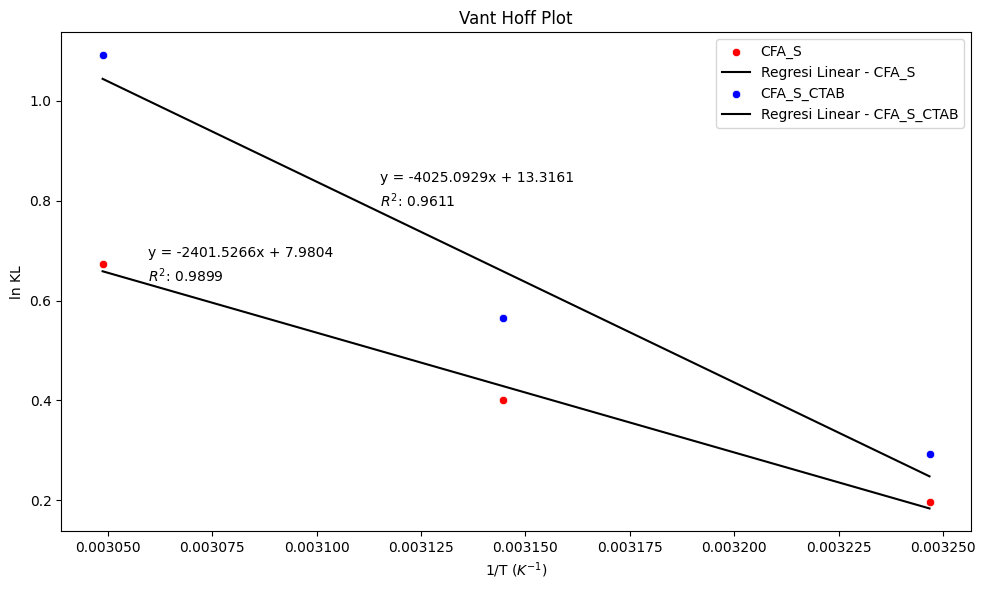

In [510]:
# Define function for plotting and regression
def plot_and_regression(ax, df, title, label, color, x_column, y_column):
    X = df[x_column]
    Y = df[y_column]  # Adjusted for 1/T

    # Reshape X to a 2D array
    X = X.values.reshape(-1, 1)

    # Create linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Make predictions
    Y_pred = model.predict(X)

    # Plotting
    sns.scatterplot(x=X.flatten(), y=Y, label=f'{label}', ax=ax, marker='o', color=color)
    sns.lineplot(x=X.flatten(), y=Y_pred, color='black', label=f'Regresi Linear - {label}', ax=ax)
    ax.set_xlabel('1/T ($K^{-1}$)')
    ax.set_ylabel('ln KL')  # Adjusted label for 1/T
    ax.set_title('Vant Hoff Plot')

    # Annotate with regression equation and R-squared
    equation_text = f'y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}'
    r2_text = f'$R^2$: {r2_score(Y, Y_pred):.4f}'

    # Position the text annotations based on the dataset
    text_x_position = 0.095 if label == 'CFA_S' else 0.35
    text_y_position = 0.55 if label == 'CFA_S' else 0.70
    
    ax.text(text_x_position, text_y_position, equation_text, transform=ax.transAxes, fontsize=10, ha='left')
    ax.text(text_x_position, text_y_position - 0.05, r2_text, transform=ax.transAxes, fontsize=10, ha='left')

    ax.legend()

    # Print regression equation and R-squared
    print(f'Regresi Linear ({label}): {equation_text}, {r2_text}')

# Set up subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and analyze for the first dataset (S_KL)
plot_and_regression(ax, df_Thermodynamics_Cal, 'Dataset - S_KL', label='CFA_S', color='red', x_column='1/T', y_column='S_KL')

# Plot and analyze for the second dataset (SC_KL)
plot_and_regression(ax, df_Thermodynamics_Cal, 'Dataset - SC_KL', label='CFA_S_CTAB', color='blue', x_column='1/T', y_column='SC_KL')

plt.tight_layout()
plt.show()


**D. Results of Thermo Study**

In [490]:
import pandas as pd

# Koefisien persamaan regresi
slope_CFA_S = 2401.5266
intercept_CFA_S = 7.9804

slope_CFA_S_CTAB = 4025.0929
intercept_CFA_S_CTAB = 13.3161

# Variasi suhu
temperature_A = 308
temperature_B = 318
temperature_C = 328

# Konstanta gas R (dalam Joule per mol per Kelvin)
R = 8.314

# Hitung delta H, delta S, dan delta G untuk CFA_S
delta_H_CFA_S = slope_CFA_S * R
delta_S_CFA_S = intercept_CFA_S * R

delta_G_CFA_S_A = (delta_H_CFA_S - (temperature_A * delta_S_CFA_S))/1000
delta_G_CFA_S_B = (delta_H_CFA_S - (temperature_B * delta_S_CFA_S))/1000
delta_G_CFA_S_C = (delta_H_CFA_S - (temperature_C * delta_S_CFA_S))/1000

# Hitung delta H, delta S, dan delta G untuk CFA_S_CTAB
delta_H_CFA_S_CTAB = slope_CFA_S_CTAB * R
delta_S_CFA_S_CTAB = intercept_CFA_S_CTAB * R

delta_G_CFA_S_CTAB_A = (delta_H_CFA_S_CTAB - (temperature_A * delta_S_CFA_S_CTAB))/1000
delta_G_CFA_S_CTAB_B = (delta_H_CFA_S_CTAB - (temperature_B * delta_S_CFA_S_CTAB))/1000
delta_G_CFA_S_CTAB_C = (delta_H_CFA_S_CTAB - (temperature_C * delta_S_CFA_S_CTAB))/1000

# Create a DataFrame
data = {
    'Parameter': ['Delta H (J/mol)', 'Delta S (J/(mol K))', f'Delta G (KJ/mol) at {temperature_A} K (CFA_S)', f'Delta G (J/mol) at {temperature_B} K (CFA_S)', f'Delta G (J/mol) at {temperature_C} K (CFA_S)', f'Delta G (J/mol) at {temperature_A} K (CFA_S_CTAB)', f'Delta G (J/mol) at {temperature_B} K (CFA_S_CTAB)', f'Delta G (J/mol) at {temperature_C} K (CFA_S_CTAB)'],
    'CFA_S': [delta_H_CFA_S, delta_S_CFA_S, delta_G_CFA_S_A, delta_G_CFA_S_B, delta_G_CFA_S_C, None, None, None],
    'CFA_S_CTAB': [delta_H_CFA_S_CTAB, delta_S_CFA_S_CTAB, delta_G_CFA_S_CTAB_A, delta_G_CFA_S_CTAB_B, delta_G_CFA_S_CTAB_C, None, None, None]
}

df_results = pd.DataFrame(data)

# Export to Excel
output_path = 'C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/results.xlsx'
df_results.to_excel(output_path, index=False)

print(f"Results exported to {output_path}")
df_results.head()


Results exported to C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/UV-Vis/results.xlsx


,Parameter,CFA_S,CFA_S_CTAB
0,Delta H (J/mol),19966.292152,33464.622371
1,Delta S (J/(mol K)),66.349046,110.710055
2,Delta G (KJ/mol) at 308 K (CFA_S),-0.469214,-0.634075
3,Delta G (J/mol) at 318 K (CFA_S),-1.132704,-1.741175
4,Delta G (J/mol) at 328 K (CFA_S),-1.796195,-2.848276


## 5. Adsorbent Reusability Study

**A. CFA_S**

In [300]:
##load Dataset
import pandas as pd

# Load your dataset from Excel file
df = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Data Dummy/Reusability_CFA_S.xlsx')
df.head()

,Cycle,adsorbance
0,1,0.068578
1,2,0.834544
2,3,1.419592


In [301]:
# Linear Regression Equation: y = 0.0507x + 0.0427
# Calculate Cf using the regression equation
df['Cremaining'] = (df['adsorbance'] - 0.0427) / 0.0507

# Calculate Cadsorbed (initial C - Cf)
initial_C = 40
df['Cadsorbed'] = initial_C - df['Cremaining']

# Calculate percentage of adsorption (Cadsorbed / initial C * 100%)
df['Adsorption_Percentage'] = (df['Cadsorbed'] / initial_C) * 100

# Export the data to a new Excel file
df.to_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Data Dummy/output_data_Reusability_CFA_S.xlsx', index=False)

# Print the first few rows of the resulting DataFrame
df.head()

,Cycle,adsorbance,Cremaining,Cadsorbed,Adsorption_Percentage
0,1,0.068578,0.510414,39.489586,98.723964
1,2,0.834544,15.618225,24.381775,60.954438
2,3,1.419592,27.157633,12.842367,32.105917


**B. CFA_S_CTAB**

In [302]:
##load Dataset
import pandas as pd

# Load your dataset from Excel file
df = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Data Dummy/Reusability_CFA_S_CTAB.xlsx')
df.head()

,Cycle,adsorbance
0,1,0.055924
1,2,0.747197
2,3,1.279212


In [303]:
# Linear Regression Equation: y = 0.0507x + 0.0427
# Calculate Cf using the regression equation
df['Cremaining'] = (df['adsorbance'] - 0.0427) / 0.0507

# Calculate Cadsorbed (initial C - Cf)
initial_C = 40
df['Cadsorbed'] = initial_C - df['Cremaining']

# Calculate percentage of adsorption (Cadsorbed / initial C * 100%)
df['Adsorption_Percentage'] = (df['Cadsorbed'] / initial_C) * 100

# Export the data to a new Excel file
df.to_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Data Dummy/output_data_Reusability_CFA_S_CTAB.xlsx', index=False)

# Print the first few rows of the resulting DataFrame
df.head()

,Cycle,adsorbance,Cremaining,Cadsorbed,Adsorption_Percentage
0,1,0.055924,0.260828,39.739172,99.347929
1,2,0.747197,13.895408,26.104592,65.261479
2,3,1.279212,24.388805,15.611195,39.027988


**C. Comparison**

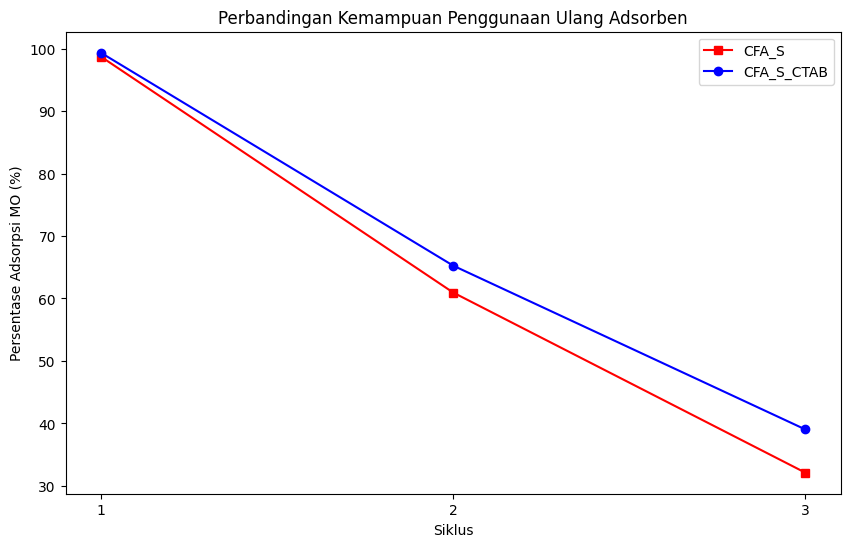

In [306]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
file_path_cfa_s = 'C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Data Dummy/output_data_Reusability_CFA_S.xlsx'
file_path_cfa_s_ctab = 'C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Data Dummy/output_data_Reusability_CFA_S_CTAB.xlsx'

df_cfa_s = pd.read_excel(file_path_cfa_s)
df_cfa_s_ctab = pd.read_excel(file_path_cfa_s_ctab)

# Define x-axis values for CFA_S
x_values_cfa_s = ['1', '2', '3']

# Define x-axis values for CFA_S_CTAB
x_values_cfa_s_ctab = ['1', '2', '3']

# Create the plot
plt.figure(figsize=(10, 6))

# Line plot for CFA_S
plt.plot(x_values_cfa_s, df_cfa_s['Adsorption_Percentage'], label='CFA_S', marker='s', color="red")

# Line plot for CFA_S_CTAB
plt.plot(x_values_cfa_s_ctab, df_cfa_s_ctab['Adsorption_Percentage'], label='CFA_S_CTAB', marker='o', color="blue")

# Set labels and title
plt.xlabel('Siklus')
plt.ylabel('Persentase Adsorpsi MO (%)')
plt.title('Perbandingan Kemampuan Penggunaan Ulang Adsorben')

# Show legend
plt.legend()

# Show the plot
plt.show()
